# Shadow Coverage on Lines

In [5]:
import pandas as pd
import math
from datetime import datetime, timedelta
import pvlib
import numpy as np

# Constants
latitude = 54.938643706057285
longitude = -110.35322727751391
tree_height = 10  # Tree height in meters
elevation = 800  # Elevation in meters
date = '2024-08-09'
timezone = 'Canada/Mountain'  # Alberta is in the Mountain Time Zone

# Generate hourly timestamps for the given date in Alberta time
timestamps = pd.date_range(start=f'{date} 00:00:00', end=f'{date} 23:59:59', freq='H', tz=timezone)

# Get solar position data using pvlib
solar_position = pvlib.solarposition.get_solarposition(timestamps, latitude, longitude, altitude=elevation)

# Function to calculate shadow length and direction
def calculate_shadow(tree_height, solar_altitude_angle, solar_azimuth_angle):
    if solar_altitude_angle <= 0:
        return None, None  # No shadow when the sun is below the horizon
    solar_altitude_angle_rad = math.radians(solar_altitude_angle)
    shadow_length = tree_height / math.tan(solar_altitude_angle_rad)
    shadow_direction = (solar_azimuth_angle + 180) % 360  # Adjust azimuth to shadow direction
    return shadow_length, shadow_direction

# Calculate shadow lengths and directions
solar_position['Shadow Length (meters)'] = solar_position.apply(
    lambda row: calculate_shadow(tree_height, row['apparent_elevation'], row['azimuth'])[0], axis=1)
solar_position['Shadow Direction (degrees)'] = solar_position.apply(
    lambda row: calculate_shadow(tree_height, row['apparent_elevation'], row['azimuth'])[1], axis=1)

# Select relevant columns and adjust timezone to Alberta time
solar_position.index = solar_position.index.tz_convert('America/Edmonton')
result = solar_position[['apparent_elevation', 'azimuth', 'Shadow Length (meters)', 'Shadow Direction (degrees)']]
result.rename(columns={'apparent_elevation': 'Solar Altitude Angle (degrees)',
                       'azimuth': 'Solar Azimuth Angle (degrees)'}, inplace=True)
result.reset_index(inplace=True)
result.rename(columns={'index': 'Time (Alberta)'}, inplace=True)

import math
import numpy as np

def calculate_ns_ew_percentage(shadow_length, shadow_direction):
    if shadow_length is None or shadow_direction is None:
        return None, None
    shadow_direction_rad = math.radians(shadow_direction)
    ns_shadow_length = shadow_length * abs(math.sin(shadow_direction_rad))
    ew_shadow_length = shadow_length * abs(math.cos(shadow_direction_rad))
    ns_percentage = (ns_shadow_length / shadow_length) * 100
    ew_percentage = (ew_shadow_length / shadow_length) * 100
    return np.round(ns_percentage, 0), np.round(ew_percentage, 0)


# Calculate NS and EW shadow percentages
result['NS Shadow Percentage (%)'] = result.apply(
    lambda row: calculate_ns_ew_percentage(row['Shadow Length (meters)'], row['Shadow Direction (degrees)'])[0], axis=1)
result['EW Shadow Percentage (%)'] = result.apply(
    lambda row: calculate_ns_ew_percentage(row['Shadow Length (meters)'], row['Shadow Direction (degrees)'])[1], axis=1)

# Convert shadow length and direction to integers
result['Shadow Length (meters)'] = result['Shadow Length (meters)'].fillna(0).astype(int)
result['Shadow Direction (degrees)'] = result['Shadow Direction (degrees)'].fillna(0).astype(int)

# Display the DataFrame
result


/tmp/ipykernel_510940/3555840644.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result.rename(columns={'apparent_elevation': 'Solar Altitude Angle (degrees)',
/tmp/ipykernel_510940/3555840644.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result.rename(columns={'index': 'Time (Alberta)'}, inplace=True)
/tmp/ipykernel_510940/3555840644.py:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-v

,Time (Alberta),Solar Altitude Angle (degrees),Solar Azimuth Angle (degrees),Shadow Length (meters),Shadow Direction (degrees),NS Shadow Percentage (%),EW Shadow Percentage (%)
0,2024-08-09 00:00:00-06:00,-16.999651,338.120334,0,0,NaN,NaN
1,2024-08-09 01:00:00-06:00,-19.150259,353.145239,0,0,NaN,NaN
2,2024-08-09 02:00:00-06:00,-19.043845,8.430989,0,0,NaN,NaN
3,2024-08-09 03:00:00-06:00,-16.692027,23.406864,0,0,NaN,NaN
4,2024-08-09 04:00:00-06:00,-12.328886,37.634139,0,0,NaN,NaN
5,2024-08-09 05:00:00-06:00,-6.327395,50.954615,0,0,NaN,NaN
6,2024-08-09 06:00:00-06:00,1.234815,63.484212,463,243,89.0,45.0
7,2024-08-09 07:00:00-06:00,9.036441,75.533578,62,255,97.0,25.0
8,2024-08-09 08:00:00-06:00,17.492031,87.546093,31,267,100.0,4.0
9,2024-08-09 09:00:00-06:00,26.047977,100.084915,20,280,98.0,18.0


In [6]:
RESULTS = result.copy()

### Plot

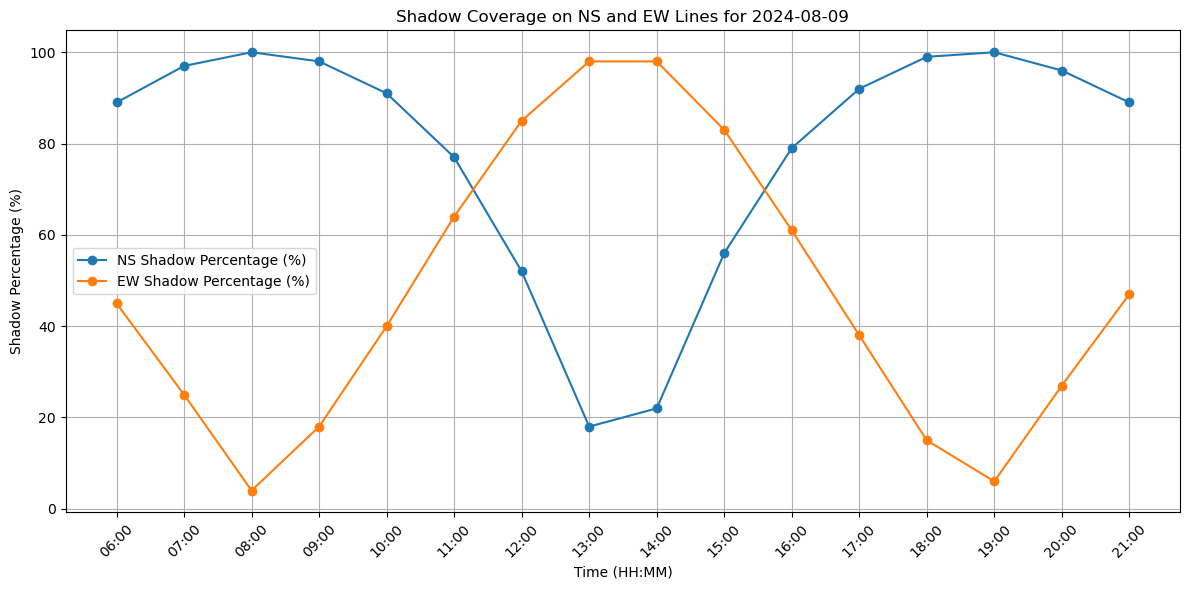

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming RESULTS is your DataFrame
# Convert 'Time (Alberta)' to datetime and extract the time in 9:00 format
RESULTS['Time'] = pd.to_datetime(RESULTS['Time (Alberta)'])
RESULTS['Formatted Time'] = RESULTS['Time'].dt.strftime('%H:%M')

# Plotting the data
plt.figure(figsize=(12, 6))
plt.plot(RESULTS['Formatted Time'].to_numpy(), RESULTS['NS Shadow Percentage (%)'].to_numpy(), label='NS Shadow Percentage (%)', marker='o')
plt.plot(RESULTS['Formatted Time'].to_numpy(), RESULTS['EW Shadow Percentage (%)'].to_numpy(), label='EW Shadow Percentage (%)', marker='o')
plt.xlabel('Time (HH:MM)')
plt.ylabel('Shadow Percentage (%)')
plt.title(f'Shadow Coverage on NS and EW Lines for {date}')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
